<a href="https://colab.research.google.com/github/pagand/NRC/blob/main/Feature/PCA_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently
import math
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/queenCsvOut.csv', index_col=None, skiprows=[1])
df = df.fillna(0)
print(df)

                  Dati  Time  ...  WIND_ANGLE_TRUE  WIND_SPEED_TRUE
0        190830_000000   0.0  ...          16.3723           5.8379
1        190830_000100   1.0  ...          44.3432           8.2348
2        190830_000200   2.0  ...          44.1781           4.9241
3        190830_000300   3.0  ...          26.2657           6.1525
4        190830_000400   4.0  ...          30.9895           4.6435
...                ...   ...  ...              ...              ...
1098849  210930_225300   0.0  ...           0.0000           0.0000
1098850  210930_225400   0.0  ...           0.0000           0.0000
1098851  210930_225500   0.0  ...           0.0000           0.0000
1098852  210930_225600   0.0  ...           0.0000           0.0000
1098853  210930_225700   0.0  ...           0.0000           0.0000

[1098854 rows x 41 columns]


In [ ]:
df.head(5)

,Dati,Time,CARGO,CARGO_PAX,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWRATEB,ENGINE_1_FLOWTEMPA,ENGINE_1_FLOWTEMPB,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWRATEB,ENGINE_2_FLOWTEMPA,ENGINE_2_FLOWTEMPB,ENGINE_2_FUEL_CONSUMPTION,HEADING,LATITUDE,LONGITUDE,PAX,PITCH_1,PITCH_2,POWER_1,POWER_2,RATE_OF_TURN,SOG,SOG_SPEEDLOG_LONG,SOG_SPEEDLOG_TRANS,SPEED_1,SPEED_2,STW,THRUST_1,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE
0,190830_000000,0.0,1.000000e+09,1.0,0.0049,-195.7947,2874.4858,2678.6912,30.7517,35.60,172.3518,-294.1984,1196.3840,902.1856,30.8517,33.5583,254.7957,3.4,49.3771,-123.2715,0.0,65.67,75.2,906.0803,0.0,-0.0002,0.0100,0.0000,0.0000,840.4929,0.0,0.0100,173.1906,0.0,61.7668,0.0,192.5550,193.0,5.8283,16.3723,5.8379
1,190830_000100,1.0,1.000000e+09,1.0,0.0050,-196.1073,2875.3389,2679.2317,30.6250,35.60,172.6706,-321.9533,1224.3627,902.4094,30.7300,33.4533,278.6818,3.4,49.3771,-123.2715,0.0,65.67,75.2,907.6771,0.0,-0.0006,0.0117,0.0050,0.0017,840.5825,0.0,0.0283,173.4646,0.0,61.8693,0.0,181.2967,221.0,8.2265,44.3432,8.2348
2,190830_000200,2.0,1.000000e+09,1.0,0.0050,-188.3371,2911.7334,2723.3962,30.4967,35.60,166.1199,-280.9333,1197.0101,916.0769,30.6033,33.3400,243.6363,3.3,49.3771,-123.2715,0.0,65.67,75.2,635.2236,0.0,0.0002,0.0150,0.0000,0.0050,818.9124,0.0,0.0467,118.5395,0.0,44.2674,0.0,166.5850,221.0,4.9133,44.1781,4.9241
3,190830_000300,3.0,1.000000e+09,1.0,0.0050,-196.6828,2932.1985,2735.5156,30.4000,35.60,173.2781,-193.0025,1121.8485,928.8461,30.5183,33.2233,168.3220,3.3,49.3771,-123.2715,0.0,65.67,75.2,514.6831,0.0,-0.0004,0.0083,0.0000,0.0000,808.5920,0.0,0.0467,94.1722,0.0,36.4697,0.0,187.0533,203.0,6.1450,26.2657,6.1525
4,190830_000400,4.0,1.000000e+09,1.0,0.0051,-230.8546,2908.0278,2677.1733,30.3567,35.52,202.3741,-157.9127,1089.2361,931.3233,30.4567,33.1033,138.2327,3.4,49.3771,-123.2715,0.0,65.67,75.2,518.9356,0.0,0.0008,0.2150,0.2033,0.0300,828.1191,0.0,0.1200,78.4188,0.0,35.9350,0.0,119.7333,209.0,4.4600,30.9895,4.6435


we can see that each data frame has 36 features

In [ ]:
df.describe()

,Time,CARGO,CARGO_PAX,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWRATEB,ENGINE_1_FLOWTEMPA,ENGINE_1_FLOWTEMPB,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWRATEB,ENGINE_2_FLOWTEMPA,ENGINE_2_FLOWTEMPB,ENGINE_2_FUEL_CONSUMPTION,HEADING,LATITUDE,LONGITUDE,PAX,PITCH_1,PITCH_2,POWER_1,POWER_2,RATE_OF_TURN,SOG,SOG_SPEEDLOG_LONG,SOG_SPEEDLOG_TRANS,SPEED_1,SPEED_2,STW,THRUST_1,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE
count,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1098854.0,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06
mean,5.492305e+05,5.089978e+08,5.089978e-01,3.637227e-02,-2.453750e+02,1.256195e+03,1.010820e+03,1.924396e+01,2.328325e+01,2.140653e+02,-2.741246e+02,7.131975e+02,4.390729e+02,1.898041e+01,2.180653e+01,2.376400e+02,8.909142e+01,3.533387e+01,-8.846107e+01,0.0,1.383489e+02,1.076078e+02,1.233243e+03,7.327953e+02,9.019744e-04,5.580626e+00,-1.403738e+00,3.764225e-02,3.420237e+02,1.953896e+02,5.779008e+00,9.957190e+01,6.222430e+01,6.754816e+01,4.011097e+01,8.422167e+01,1.056975e+02,7.512766e+00,8.986735e+00,9.530169e+00
std,3.172119e+05,4.999023e+08,4.999023e-01,6.231479e-02,3.214042e+02,1.299367e+03,1.098966e+03,1.191029e+01,1.431874e+01,2.791446e+02,3.355050e+02,7.488983e+02,4.530809e+02,1.178061e+01,1.366573e+01,2.903337e+02,1.135852e+02,2.222929e+01,5.565280e+01,0.0,2.225638e+02,1.859808e+02,2.277043e+03,1.920741e+03,6.777738e-02,8.491585e+00,1.005451e+01,3.762700e-01,4.725427e+02,3.967516e+02,8.514709e+00,1.650055e+02,1.453012e+02,1.205084e+02,1.022845e+02,1.026417e+02,1.241056e+02,9.380583e+00,4.375042e+01,1.377239e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.142971e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.050410e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.239570e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.080900e+00,0.000000e+00,-2.162830e+01,-4.768300e+00,-1.750530e+03,-7.497173e+02,0.000000e+00,-4.588942e+02,-3.827733e+02,-3.817200e+00,-5.520900e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+01,0.000000e+00
25%,2.745172e+05,0.000000e+00,0.000000e+00,0.000000e+00,-5.723537e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.167607e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.235161e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.514625e+00,0.000000e+00
50%,5.492305e+05,1.000000e+09,1.000000e+00,5.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e+01,2.859500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.275000e+01,2.621830e+01,0.000000e+00,5.600000e+00,4.927670e+01,-1.232715e+02,0.0,6.456990e+01,6.490940e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.033000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,2.996700e+00,0.000000e+00,2.855000e+00
75%,8.239438e+05,1.000000e+09,1.000000e+00,2.980000e-02,0.000000e+00,2.533002e+03,1.930088e+03,2.827670e+01,3.349830e+01,4.989660e+02,0.000000e+00,1.493104e+03,8.771270e+02,2.799330e+01,3.165000e+01,5.347826e+02,2.326000e+02,4.937710e+01,0.000000e+00,0.0,7.069770e+01,7.083765e+01,9.772057e+02,7.324000e-01,0.000000e+00,1.785170e+01,0.000000e+00,0.000000e+00,8.671655e

In [ ]:
df2 = df.iloc[:, 3:]
df2.describe()

,CARGO_PAX,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWRATEB,ENGINE_1_FLOWTEMPA,ENGINE_1_FLOWTEMPB,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWRATEB,ENGINE_2_FLOWTEMPA,ENGINE_2_FLOWTEMPB,ENGINE_2_FUEL_CONSUMPTION,HEADING,LATITUDE,LONGITUDE,PAX,PITCH_1,PITCH_2,POWER_1,POWER_2,RATE_OF_TURN,SOG,SOG_SPEEDLOG_LONG,SOG_SPEEDLOG_TRANS,SPEED_1,SPEED_2,STW,THRUST_1,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE
count,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1098854.0,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06,1.098854e+06
mean,5.089978e-01,3.637227e-02,-2.453750e+02,1.256195e+03,1.010820e+03,1.924396e+01,2.328325e+01,2.140653e+02,-2.741246e+02,7.131975e+02,4.390729e+02,1.898041e+01,2.180653e+01,2.376400e+02,8.909142e+01,3.533387e+01,-8.846107e+01,0.0,1.383489e+02,1.076078e+02,1.233243e+03,7.327953e+02,9.019744e-04,5.580626e+00,-1.403738e+00,3.764225e-02,3.420237e+02,1.953896e+02,5.779008e+00,9.957190e+01,6.222430e+01,6.754816e+01,4.011097e+01,8.422167e+01,1.056975e+02,7.512766e+00,8.986735e+00,9.530169e+00
std,4.999023e-01,6.231479e-02,3.214042e+02,1.299367e+03,1.098966e+03,1.191029e+01,1.431874e+01,2.791446e+02,3.355050e+02,7.488983e+02,4.530809e+02,1.178061e+01,1.366573e+01,2.903337e+02,1.135852e+02,2.222929e+01,5.565280e+01,0.0,2.225638e+02,1.859808e+02,2.277043e+03,1.920741e+03,6.777738e-02,8.491585e+00,1.005451e+01,3.762700e-01,4.725427e+02,3.967516e+02,8.514709e+00,1.650055e+02,1.453012e+02,1.205084e+02,1.022845e+02,1.026417e+02,1.241056e+02,9.380583e+00,4.375042e+01,1.377239e+01
min,0.000000e+00,0.000000e+00,-1.142971e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.050410e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.239570e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.080900e+00,0.000000e+00,-2.162830e+01,-4.768300e+00,-1.750530e+03,-7.497173e+02,0.000000e+00,-4.588942e+02,-3.827733e+02,-3.817200e+00,-5.520900e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e+01,0.000000e+00
25%,0.000000e+00,0.000000e+00,-5.723537e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.167607e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.235161e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.514625e+00,0.000000e+00
50%,1.000000e+00,5.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e+01,2.859500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.275000e+01,2.621830e+01,0.000000e+00,5.600000e+00,4.927670e+01,-1.232715e+02,0.0,6.456990e+01,6.490940e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.033000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,2.996700e+00,0.000000e+00,2.855000e+00
75%,1.000000e+00,2.980000e-02,0.000000e+00,2.533002e+03,1.930088e+03,2.827670e+01,3.349830e+01,4.989660e+02,0.000000e+00,1.493104e+03,8.771270e+02,2.799330e+01,3.165000e+01,5.347826e+02,2.326000e+02,4.937710e+01,0.000000e+00,0.0,7.069770e+01,7.083765e+01,9.772057e+02,7.324000e-01,0.000000e+00,1.785170e+01,0.000000e+00,0.000000e+00,8.671655e+02,0.000000e+00,1.788000e+01,1.826547e+02,1.474690e+01,6.520960e+01,0.000000e+00,1.873400e+02,1.980000e+02,1.333000e+01,4.032420e+01,1.101185e+01
max,1.000000e+00,3.231000e-01,4.574403e+02,5.8

one way to find corrolated data would be to check the correlation of some of the features and hope that some of them are repeats (can be removed). Let’s try it out and display the correlation matrix.

In [ ]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Time,CARGO,CARGO_PAX,DEPTH,ENGINE_1_FLOWRATE,ENGINE_1_FLOWRATEA,ENGINE_1_FLOWRATEB,ENGINE_1_FLOWTEMPA,ENGINE_1_FLOWTEMPB,ENGINE_1_FUEL_CONSUMPTION,ENGINE_2_FLOWRATE,ENGINE_2_FLOWRATEA,ENGINE_2_FLOWRATEB,ENGINE_2_FLOWTEMPA,ENGINE_2_FLOWTEMPB,ENGINE_2_FUEL_CONSUMPTION,HEADING,LATITUDE,LONGITUDE,PAX,PITCH_1,PITCH_2,POWER_1,POWER_2,RATE_OF_TURN,SOG,SOG_SPEEDLOG_LONG,SOG_SPEEDLOG_TRANS,SPEED_1,SPEED_2,STW,THRUST_1,THRUST_2,TORQUE_1,TORQUE_2,TRACK_MADE_GOOD,WIND_ANGLE,WIND_SPEED,WIND_ANGLE_TRUE,WIND_SPEED_TRUE
Time,1.000000,-0.369263,-0.369263,0.088602,-0.095357,0.157795,0.158682,0.315230,0.304590,0.094806,-0.140011,0.165690,0.170192,0.316450,0.300219,0.138922,0.125420,0.207479,-0.207620,nan,-0.231319,-0.248124,0.104862,0.020790,-0.002501,0.092653,-0.052337,0.047579,0.142578,0.040984,0.087388,0.114504,0.031370,0.110492,0.024319,-0.319276,0.124464,0.095320,0.035041,0.103505
CARGO,-0.369263,1.000000,1.000000,0.154810,-0.205917,0.262042,0.249605,0.449068,0.457620,0.207907,-0.201504,0.240896,0.248964,0.443965,0.442157,0.203053,0.197225,0.505425,-0.505170,nan,0.610524,0.568274,0.139414,0.093121,0.013071,0.172573,-0.038955,0.006544,0.193519,0.109759,0.186438,0.156380,0.093290,0.141947,0.092698,0.805891,0.257922,0.241537,0.067797,0.205169
CARGO_PAX,-0.369263,1.000000,1.000000,0.154810,-0.205917,0.262042,0.249605,0.449068,0.457620,0.207907,-0.201504,0.240896,0.248964,0.443965,0.442157,0.203053,0.197225,0.505425,-0.505170,nan,0.610524,0.568274,0.139414,0.093121,0.013071,0.172573,-0.038955,0.006544,0.193519,0.109759,0.186438,0.156380,0.093290,0.141947,0.092698,0.805891,0.257922,0.241537,0.067797,0.205169
DEPTH,0.088602,0.154810,0.154810,1.000000,-0.798815,0.485070,0.339903,0.359179,0.457501,0.798639,-0.781136,0.667135,0.524281,0.373833,0.489547,0.780822,0.752348,0.366376,-0.368383,nan,0.343364,0.210271,0.587207,0.441301,-0.002880,0.843768,-0.186196,0.027319,0.376336,0.265984,0.834939,0.555253,0.431609,0.579946,0.434364,0.023372,0.129519,0.733329,0.113198,0.684900
ENGINE_1_FLOWRATE,-0.095357,-0.205917,-0.205917,-0.798815,1.000000,-0.699113,-0.534138,-0.462709,-0.583665,-0.999920,0.990639,-0.891665,-0.740269,-0.484293,-0.621600,-0.990460,-0.901007,-0.476609,0.479525,nan,-0.456302,-0.351054,-0.708182,-0.548404,-0.008166,-0.955542,0.182472,-0.123312,-0.574949,-0.419138,-0.944474,-0.704213,-0.557448,-0.704334,-0.543546,-0.062093,-0.181017,-0.863458,-0.135186,-0.783012
ENGINE_1_FLOWRATEA,0.157795,0.262042,0.262042,0.485070,-0.699113,1.000000,0.977892,0.554571,0.649386,0.703152,-0.761783,0.932951,0.977978,0.582919,0.666323,0.763521,0.692274,0.601384,-0.604053,nan,0.506610,0.439375,0.497748,0.336715,0.014177,0.583346,-0.130684,0.092817,0.732399,0.485773,0.572910,0.569785,0.388483,0.520480,0.349654,0.186609,0.331872,0.583355,0.098282,0.532790
ENGINE_1_FLOWRATEB,0.158682,0.249605,0.249605,0.339903,-0.534138,0.977892,1.000000,0.520375,0.597106,0.538938,-0.610975,0.842302,0.939817,0.547580,0.606036,0.613082,0.555004,0.571659,-0.573962,nan,0.465542,0.416828,0.381399,0.237730,0.014374,0.410263,-0.101148,0.073679,0.697805,0.451774,0.401162,0.467734,0.296292,0.409402,0.254449,0.202478,0.339450,0.437205,0.076667,0.400946
ENGINE_1_FLOWTEMPA,0.315230,0.449068,0.449068,0.359179,-0.462709,0.554571,0.520375,1.000000,0.982860,0.463517,-0.498881,0.559839,0.555938,0.999053,0.978439,0.498507,0.472887,0.922840,-0.922927,nan,0.290725,0.284087,0.325791,0.243838,0.006376,0.403401,-0.078609,0.067219,0.424144,0.311633,0.414769,0.360853,0.274217,0.336135,0.249616,0.413738,0.499087,0.466679,0.122241,0.400294
ENGINE_1_FLOWTEMPB,0.304590,0.457620,0.457620,0.457501,-0.583665,0.649386,0.597106,0.982860,1.000000,0.584908,-0.618718,0.672942,0.654149,0.986702,0.995586,0.618702,0.585865,0.926191,-0.926814,nan,0.357243,0.329514,0.415280,0.303080,0.009511,0.519436,-0.107487,0.074550,0.504333,0.358235,0.529851,0.449544,0.336263,0.425189,0.308501,0.390626,0.492131,0.566389,0.132200,0.495815
ENGINE_1_FUEL_CONSUMPTION,0.094806,0.207907,0.207907,0.798639,-0.999920,0.703152,0.538938,0.46351

In [ ]:
del df['PAX']
del df['CARGO_PAX']
del df['ENGINE_1_FLOWRATEB']
del df['ENGINE_1_FLOWTEMPB']
del df['ENGINE_2_FLOWRATEB']
del df['ENGINE_2_FLOWTEMPB']

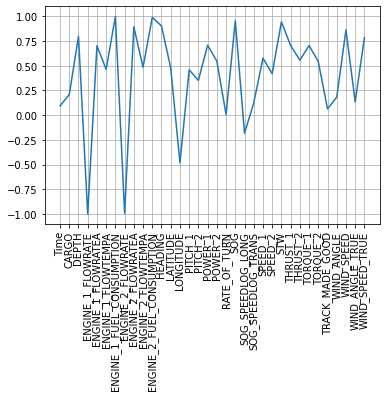

In [ ]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')
correlation["ENGINE_1_FUEL_CONSUMPTION"].plot()
plt.xticks([i for i in range(0,34)],correlation.index,rotation=90)
plt.grid()


# Dimonsion reduction using PCA **
**Step 1: Normalize data**


The normalization follows this formula = (value-mean)/std

In [ ]:
from sklearn.preprocessing import StandardScaler
std_df = StandardScaler().fit_transform(df) # normalizing the data 

**Step 2: Principle component**


Sci-kit learn makes it very easy to get the principal components

In [ ]:
pca = PCA(n_components=34)
principalComponents = pca.fit_transform(std_df)

A PC is a linear combination of the variables such that they have no correlation with each other (they are orthogonal) and that most of the information is squeezed into the first few PCs. In this case, “information” is the variance.

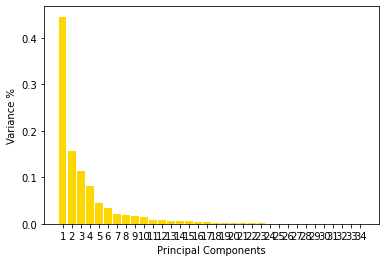

In [ ]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

As we see, most of the variance is put in the first component. What is left is put in component 2, then component 3, etc.

Now that we have the intuition, let’s proceed with the implementation. Let’s just plot the first 2.

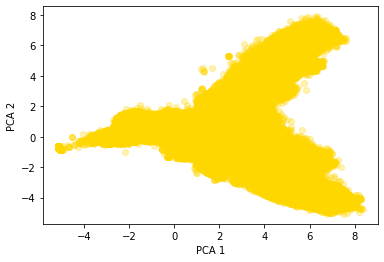

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

PCA has helped us to reduce the dimension of our data and we were able to make this nice plot. 

**Step 3: computing inertia **


To make the clusters more apparent, let’s use the K-means clustering algorithm to color-code them. I don’t want this post to get too heavy so I won’t be explaining the intuition behind this one. let's use inertia to help us with number of clusters.

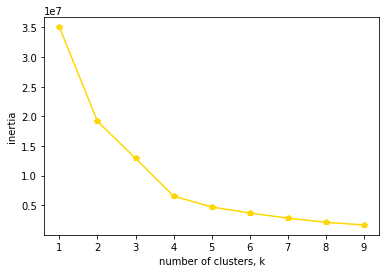

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks()
plt.show()

Typically, we look at these inertia plots to find the elbow point. In our case, it looks like the elbow occurs with 4 clusters, so we will proceed with that.


So, let’s create our final model with 4 clusters on PC1 to PC5:



**Step 4: Clustering: K-means **


We use the first 5 elements of PC's to create 4 clusters

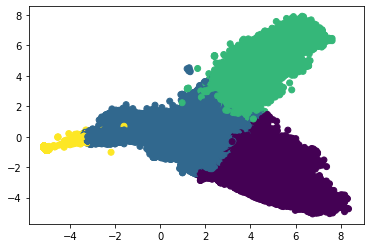

In [ ]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:4])

labels = model.predict(PCA_components.iloc[:,:4])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

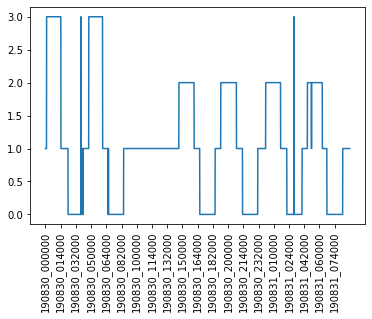

In [ ]:
fig , ax = plt.subplots(1,1)
ax.plot(df.iloc[:2000,0],labels[:2000,])
time = df.iloc[:2000,0]
ax.set_xticks(time[::100])
ax.set_xticklabels(time[::100], rotation=90)
plt.show()